In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy import stats
import scipy as sp
import statsmodels.formula.api as smf
import statsmodels.api as sm
plt.rc('figure', figsize = (12,12))

In [2]:
df = pd.read_csv('dataset/data.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:

df.insert(9,'Position_Class',
            df.apply(lambda x: 
            'Forward' if x['Position'] in ['LS','ST','RS','LW','LF','CF','RF','RW']
            else 'Midfielder' if x['Position'] in ['LAM','CAM','RAM','LM','LCM','CM','RCM','RM']
            else 'Defender' if x['Position'] in  ['LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']
            else 'GoalKeeper', axis =1))

In [4]:
df.drop(['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'], axis=1, inplace=True)

In [21]:
def cut(Value):
    out = Value.replace('€','')
    if 'M' in out:
        out = float(out.replace('M',''))*1000000
    elif 'K' in out:
        out = float(out.replace('K',''))*1000
    return float(out)
df['Wage'] = df.Wage.apply(cut)
df['Value'] =df.Value.apply(cut)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 64 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Position_Class            18207 non-null  object 
 10  Club                      17966 non-null  object 
 11  Club Logo                 18207 non-null  object 
 12  Value                     18207 non-null  float64
 13  Wage                      18207 non-null  float64
 14  Specia

In [6]:
df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 64, dtype: int64

In [23]:
# 팀원과 상의후 처리할데이터 분할
data = df[['Position_Class','ShortPassing','Volleys','Dribbling','Curve',
           'FKAccuracy','LongPassing','BallControl','Acceleration',
           'SprintSpeed','Agility','Reactions','Balance' ,'ShotPower',
           'Jumping','Stamina','Strength','Wage','Value']]                  

In [24]:
data

,Position_Class,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,Wage,Value
0,Forward,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,565000.0,110500000.0
1,Forward,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,405000.0,77000000.0
2,Forward,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,290000.0,118500000.0
3,GoalKeeper,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,260000.0,72000000.0
4,Midfielder,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,355000.0,102000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,Midfielder,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,1000.0,60000.0
18203,Forward,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,1000.0,60000.0
18204,Forward,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,1000.0,60000.0
18205,Forward,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,1000.0,60000.0


In [20]:
# Wage 데이터 float으로 타입변환
def cut(Value):
    out = Value.replace('€','')
    if 'M' in out:
        out = float(out.replace('M',''))*1000000
    elif 'K' in out:
        out = float(out.replace('K',''))*1000
    return float(out)
data['Wage'] = df.Wage.apply(cut)
data['Value'] =df.Value.apply(cut)

<ipython-input-20-f4bf0678ea0f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Wage'] = df.Wage.apply(cut)
<ipython-input-20-f4bf0678ea0f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Value'] =df.Value.apply(cut)


In [9]:
# nan 확인
data.isnull().sum()

Position_Class     0
ShortPassing      48
Volleys           48
Dribbling         48
Curve             48
FKAccuracy        48
LongPassing       48
BallControl       48
Acceleration      48
SprintSpeed       48
Agility           48
Reactions         48
Balance           48
ShotPower         48
Jumping           48
Stamina           48
Strength          48
Wage               0
Value              0
dtype: int64

In [10]:
# nan값 제거
data.drop(data[data['ShortPassing'] != data.ShortPassing].index,inplace =True)


C:\ca_ba\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


 히트맵 함수를 통해 각 능력치들과 Wage간의 상관관계를 분석
 
 능력치들 사이의 상관관계가 다양하며 큰 상관관계를 보여주는 부분도 많다
 
 하지만 능력치와 Wage간의 상관관계는 높지 않았으며 그나마 'Reactions'이 0.5의 상관관계를 보여줌
 
 Reactions는 반응속도로 Passing 능력치들과 그나마 연관성을 보인다.
 
 Jumping, Strength는 다른 능력치들과의 연관성도 미미하다
 
 Strength 와 Balance는 음의 상관관계가 존재.
 
 

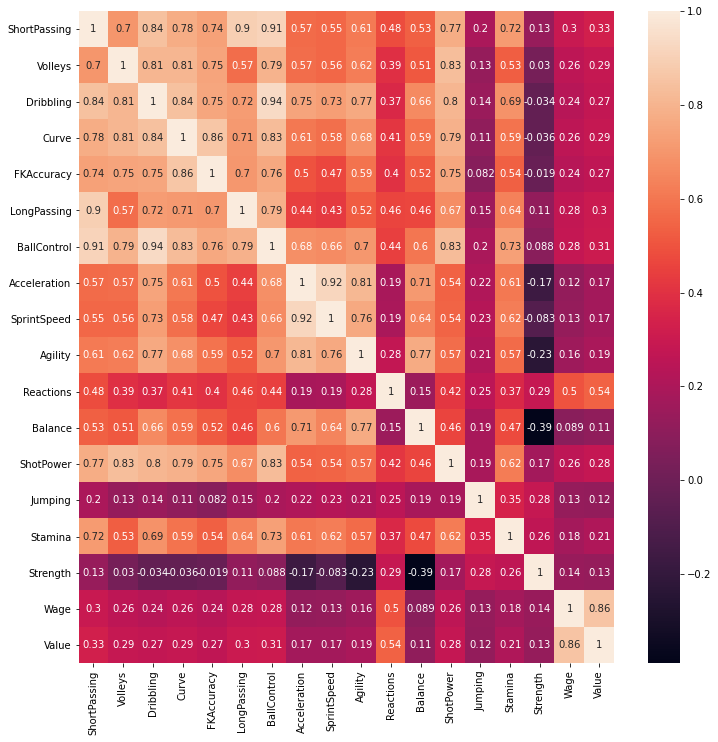

In [11]:
fig = plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True)


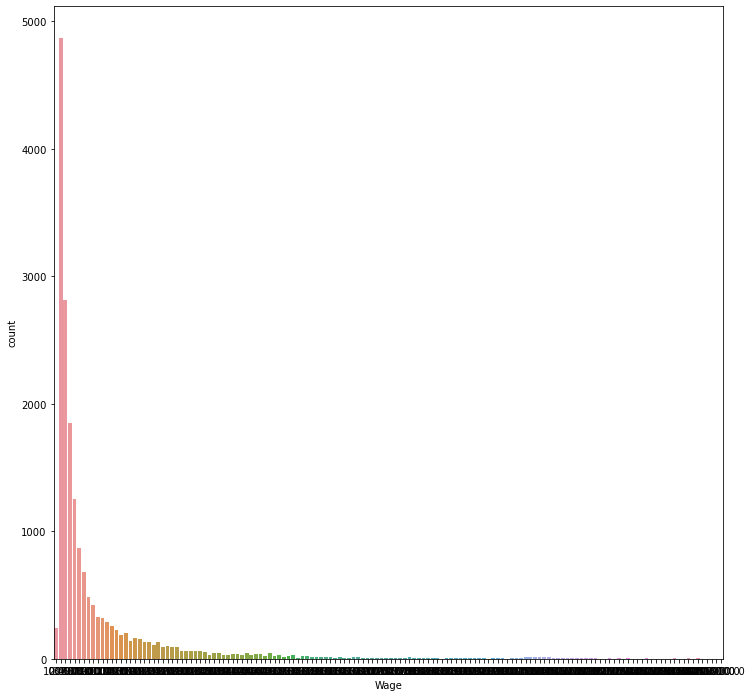

In [96]:
# 
fig = plt.figure(figsize=(12,12))
sns.countplot('Wage',data=data)

<Figure size 864x864 with 0 Axes>

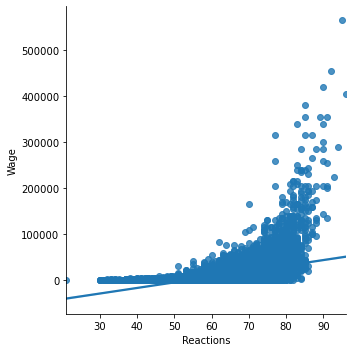

In [129]:
fig = plt.figure(figsize=(12,12))
sns.lmplot(x='Contract Valid Until',y ='Wage' ,data = data)

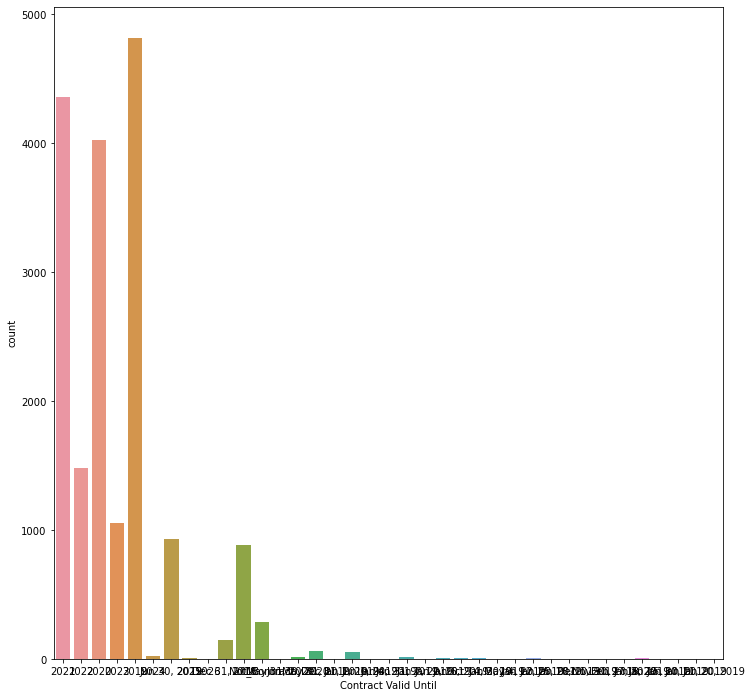

In [28]:
fig = plt.figure(figsize=(12,12))
sns.countplot(x='Contract Valid Until' ,data = df)

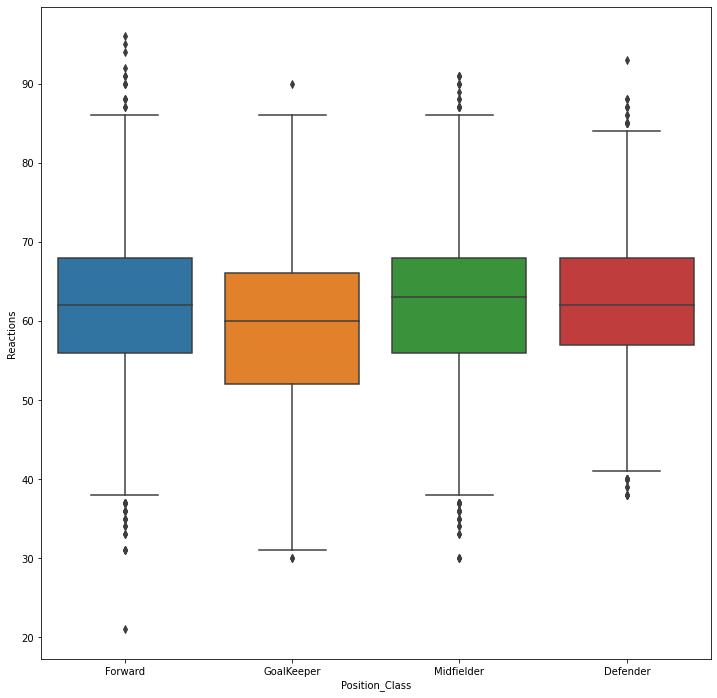

In [135]:
sns.boxplot(x ="Position_Class", y = 'Reactions',data = data )

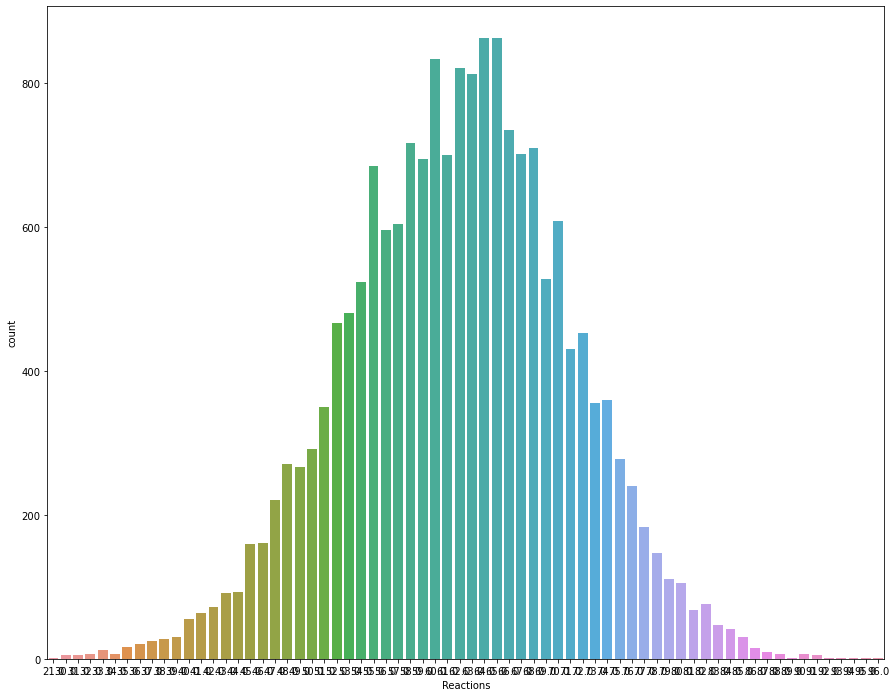

In [139]:
g = plt.figure(figsize=(15,12))
sns.countplot('Reactions',data=data )

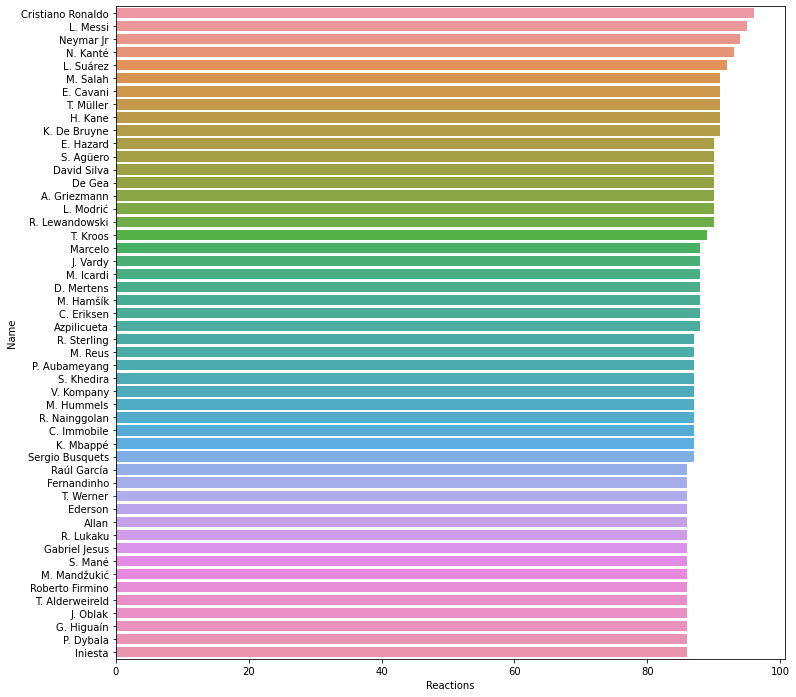

In [144]:
ply = df.sort_values('Reactions', ascending =False)[['Name','Age','Wage','Overall','Reactions']]
# ply.head(20)
sns.barplot(x ="Reactions", y = 'Name',data = ply.head(50) )

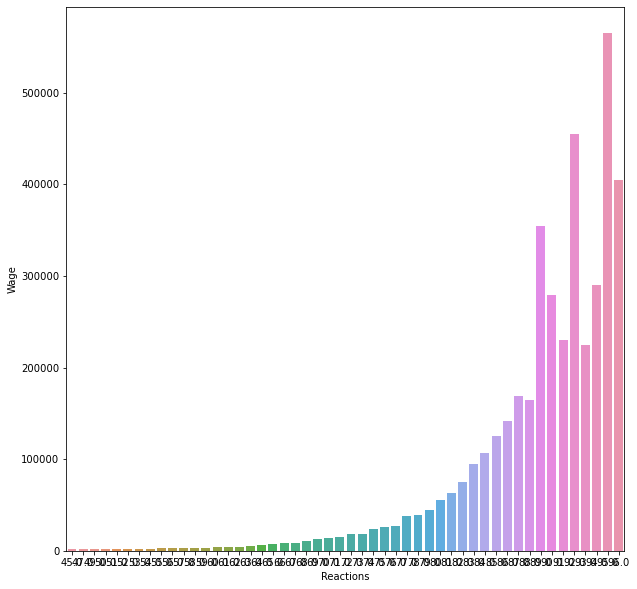

In [120]:
Rval = data.groupby('Reactions')['Wage'].mean().reset_index().sort_values('Wage',ascending = False)
Rval.head(50).round(2)
plt.figure(figsize=(10,10))
sns.barplot(x='Reactions',y="Wage",data = Rval.head(50))

In [132]:
model = smf.ols('Wage~Reactions', data = data ).fit()
model.summary()
sm.stats.anova_lm(model , type = 2).round(2)

,df,sum_sq,mean_sq,F,PR(>F)
Reactions,1.0,2.163056e+12,2.163056e+12,5910.47,0.0
Residual,18157.0,6.644920e+12,3.659701e+08,NaN,NaN


In [32]:
df['Contract Valid Until'].plot(kind = 'hist')

TypeError: no numeric data to plot

In [17]:
df['Contract Valid Until'].unique()


array(['2021', '2022', '2020', '2023', '2019', '2024', 'Jun 30, 2019',
       '2025', '2026', 'Dec 31, 2018', '2018', 'Not_Contract',
       'May 31, 2020', 'Jun 30, 2020', 'May 31, 2019', 'Dec 31, 2019',
       'Jan 1, 2019', 'Jun 1, 2019', 'Jan 4, 2019', 'Jan 31, 2019',
       'Jan 7, 2019', 'Jan 2, 2019', 'Jan 6, 2019', 'Oct 14, 2019',
       'Jan 3, 2019', 'May 4, 2019', 'Jan 12, 2019', 'Jan 25, 2019',
       'Jan 18, 2019', 'Dec 1, 2019', 'Nov 30, 2018', 'Feb 27, 2020',
       'Jan 5, 2019', 'Jan 15, 2019', 'Jan 30, 2019', 'Jan 11, 2019',
       'Jan 20, 2019'], dtype=object)

In [14]:
a = df['Contract Valid Until'] != df['Contract Valid Until'] 
df['Contract Valid Until'][a] = 'Not_Contract'

<ipython-input-14-027d159bfac2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Contract Valid Until'][a] = 'Not_Contract'


In [16]:
a = df['Contract Valid Until'] == 'Not_Contract' 
df[a]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Position_Class,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
452,452,207439,L. Paredes,24,https://cdn.sofifa.org/players/4/19/207439.png,Argentina,https://cdn.sofifa.org/flags/52.png,80,85,Midfielder,...,74.0,73.0,75.0,72.0,9.0,14.0,6.0,9.0,10.0,NaN
538,538,156713,A. Granqvist,33,https://cdn.sofifa.org/players/4/19/156713.png,Sweden,https://cdn.sofifa.org/flags/46.png,80,80,Defender,...,78.0,82.0,83.0,79.0,7.0,9.0,12.0,10.0,15.0,NaN
568,568,229909,A. Lunev,26,https://cdn.sofifa.org/players/4/19/229909.png,Russia,https://cdn.sofifa.org/flags/40.png,79,81,GoalKeeper,...,69.0,18.0,20.0,12.0,80.0,73.0,65.0,77.0,85.0,NaN
677,677,187347,I. Smolnikov,29,https://cdn.sofifa.org/players/4/19/187347.png,Russia,https://cdn.sofifa.org/flags/40.png,79,79,Defender,...,73.0,76.0,76.0,80.0,7.0,12.0,10.0,8.0,15.0,NaN
874,874,187607,A. Dzyuba,29,https://cdn.sofifa.org/players/4/19/187607.png,Russia,https://cdn.sofifa.org/flags/40.png,78,78,Forward,...,70.0,21.0,15.0,19.0,15.0,12.0,11.0,11.0,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17197,17197,245164,V. Kaith,21,https://cdn.sofifa.org/players/4/19/245164.png,India,https://cdn.sofifa.org/flags/159.png,55,64,GoalKeeper,...,29.0,8.0,12.0,11.0,55.0,50.0,57.0,59.0,53.0,NaN
17215,17215,243131,K. Taimi,26,https://cdn.sofifa.org/players/4/19/243131.png,Finland,https://cdn.sofifa.org/flags/17.png,55,57,Defender,...,36.0,51.0,58.0,64.0,11.0,9.0,9.0,12.0,12.0,NaN
17339,17339,233526,S. Passi,23,https://cdn.sofifa.org/players/4/19/233526.png,India,https://cdn.sofifa.org/flags/159.png,54,63,GoalKeeper,...,45.0,14.0,23.0,21.0,8.0,6.0,13.0,9.0,10.0,NaN
17436,17436,236452,D. Lalhlimpuia,20,https://cdn.sofifa.org/players/4/19/236452.png,India,https://cdn.sofifa.org/flags/159.png,54,67,GoalKeeper,...,46.0,26.0,17.0,13.0,7.0,8.0,12.0,11.0,11.0,NaN


In [26]:
df1 = pd.read_csv('dataset/df.csv')
df1

,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Position_Class,Value,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,Forward,€110.5M,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Forward,€77M,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Forward,€118.5M,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,3,193080,De Gea,27,Spain,91,93,Manchester United,GoalKeeper,€72M,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,Midfielder,€102M,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17913,18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,Midfielder,€60K,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0
17914,18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,Forward,€60K,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0
17915,18204,241638,B. Worman,16,England,47,67,Cambridge United,Forward,€60K,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165000.0
17916,18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,Forward,€60K,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143000.0


In [31]:
df1['Loaned From'].fillna(0, inplace=True)
df1.insert(9,'isLoand',
            df.apply(lambda x: 
            0 if x['Loaned From']==0
            else 1, axis =1))
df1

,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Position_Class,isLoand,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,Forward,1,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Forward,1,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Forward,1,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,3,193080,De Gea,27,Spain,91,93,Manchester United,GoalKeeper,1,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,Midfielder,1,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17913,18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,Midfielder,1,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0
17914,18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,Forward,1,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0
17915,18204,241638,B. Worman,16,England,47,67,Cambridge United,Forward,1,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165000.0
17916,18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,Forward,1,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143000.0


In [53]:
df1.Nationality.unique()

array(['Argentina', 'Portugal', 'Brazil', 'Spain', 'Belgium', 'Croatia',
       'Uruguay', 'Slovenia', 'Poland', 'Germany', 'France', 'England',
       'Italy', 'Egypt', 'Colombia', 'Denmark', 'Gabon', 'Wales',
       'Senegal', 'Costa Rica', 'Slovakia', 'Netherlands',
       'Bosnia Herzegovina', 'Morocco', 'Serbia', 'Algeria', 'Austria',
       'Greece', 'Chile', 'Sweden', 'Korea Republic', 'Finland', 'Guinea',
       'Montenegro', 'Armenia', 'Switzerland', 'Norway', 'Czech Republic',
       'Scotland', 'Ghana', 'Central African Rep.', 'DR Congo',
       'Ivory Coast', 'Russia', 'Ukraine', 'Iceland', 'Mexico', 'Jamaica',
       'Albania', 'Venezuela', 'Japan', 'Turkey', 'Ecuador', 'Paraguay',
       'Mali', 'Nigeria', 'Cameroon', 'Dominican Republic', 'Israel',
       'Kenya', 'Hungary', 'Republic of Ireland', 'Romania',
       'United States', 'Cape Verde', 'Australia', 'Peru', 'Togo',
       'Syria', 'Zimbabwe', 'Angola', 'Burkina Faso', 'Iran', 'Estonia',
       'Tunisia', 'Equato

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17918 entries, 0 to 17917
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17918 non-null  int64  
 1   Name                      17918 non-null  object 
 2   Age                       17918 non-null  int64  
 3   Nationality               17918 non-null  object 
 4   Overall                   17918 non-null  int64  
 5   Potential                 17918 non-null  int64  
 6   Club                      17918 non-null  object 
 7   Position_Class            17918 non-null  object 
 8   isLoand                   17918 non-null  int64  
 9   isLoanded                 17918 non-null  int64  
 10  Value                     17918 non-null  object 
 11  Wage                      17918 non-null  float64
 12  Special                   17918 non-null  int64  
 13  Preferred Foot            17918 non-null  object 
 14  Intern

In [ ]:
age = df.groupby('Age')['value'].median().re